### About Audio Features

| Column   |      Value Type      |  Value Description |
|:----------|:--------------------|:-------------------|
| id | - | The Spotify ID for the track. |
| name | string | Name of the track. |
| artist | string | Artist who plays the track. |
| artist_id | - | The Spotify ID for the artist. |
| album | string | The album where the track is on. |
| album_id | - | The Spotify ID for the album. | 
| popularity | int | The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.|
| duration_ms | int | The duration of the track in milliseconds. |
| key | int | The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. |
| mode | int | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. |
| acousticness | float | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
| danceability | float | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
| energy | float | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| instrumentalness | float | Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| liveness | float | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
| loudness | float | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. |
| speechiness | float | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
| valence | float | 	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
| tempo | float | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |


### Imports

In [1]:
from diversify.session import SpotifySession
import pandas as pd
import missingno as msno

%matplotlib inline

In [ ]:
def get_genres(artists_id, session):
    response = spfy.artist(artists_id)
    if len(response['genres']) == 0:
      return []
    return response['genres']

### Users

In [2]:
# Users to login
#my_user = '12144777067' # my account
my_user = 'rm2azb4jnd15soiqhl5qc9eya' # my other account

# Users to collect songs
#user = 'belzedu' # Edu
#user = 'ilikemiojo' # Maurício
#user = 'ebetcel' # Betcel
#user = 'andreaskeete' # Bigod
#user = 'vi_liraa' # Vini
#user = 'luizbarros6' # Dudinha
#user = 'diegocostta95' # Diego
#user = 'brttrexpeita' # brTT
#user = '12152882067' # Élvis
#user = '12144777067' # my account
user = 'rm2azb4jnd15soiqhl5qc9eya' # my other account

### Releasing Spotify API access to my user

In [3]:
session = SpotifySession(my_user)



         User authentication requires interaction with your
         web browser. Once you enter your credentials and
         give authorization, you will be redirected to
         a url.  Paste that url you were directed to to
         complete the authorization.

     
Opened https://accounts.spotify.com/authorize?client_id=f4bd9bcb87724721ab5b0a9667f1ae52&response_type=code&redirect_uri=https%3A%2F%2Fedujtm.github.io%2Fdiversify%2Fredirect&scope=playlist-modify-private+user-library-read in your browser




Enter the the code pattern you were given:  AQDVJ86Pge7W_Ev2v_Q9Wd-gG6Bg1NyL1keQRmqk0Y0bp7KTk3Gi-GZVx5bS8l6NNifsl1mBHte8uABzai1F4abVDUPrWOs_m97MwIeeuaCZbHsA3oMAbMOIeLsuISP4Yf476ya-RChTzVGclIlMmlGgYxxTS0dfJtL93g_cJvxyPuxjasXWGNosIMgo7RbIZIgu3Cg7UO6U_z9gkBSaESTH30z7jT3boT-ZPyHXaKRGEOMqgeBac8F1IkQOxYqIjzXC3IxmqWNXKsk9jmVO


### Collecting tracks for the train dataset

- Collecting tracks

In [4]:
songs = session.get_favorite_songs()
df_songs = pd.DataFrame(songs)

print(df_songs.shape)
df_songs.head(3)

(10000, 8)


,name,album,album_id,artist,artist_id,id,popularity,duration_ms
0,"Lover, Leaver","Lover, Leaver",2pwQljRu5CDZrWWewU4Tdy,Greta Van Fleet,4NpFxQe2UvRCAjto3JqlSl,7wjsFW5cSAGy2T9fZbJ6be,10,215013
1,When The Curtain Falls,When The Curtain Falls,6sZZUbFqCVf3NLXYBLzFNj,Greta Van Fleet,4NpFxQe2UvRCAjto3JqlSl,3Rw9J03nW964TruD23gfaS,10,221893
2,インフェルノ,インフェルノ,137FjNv5TRNvbW6D17bQc1,Mrs. GREEN APPLE,4QvgGvpgzgyUOo8Yp8LDm9,64yajM6CxtLghmgB53VeXT,71,212546


- Collecting features for the tracks above

In [5]:
features = session.get_favorite_songs(features = True)
df_features = pd.DataFrame(features)

print(df_features.shape)
df_features.head(3)

(10000, 12)


,id,speechiness,valence,mode,liveness,key,danceability,loudness,acousticness,instrumentalness,energy,tempo
0,7wjsFW5cSAGy2T9fZbJ6be,0.0475,0.617,1,0.1360,9,0.496,-3.878,0.00213,0.2100,0.922,91.972
1,3Rw9J03nW964TruD23gfaS,0.1560,0.674,1,0.0713,0,0.381,-2.258,0.04570,0.0706,0.975,191.974
2,64yajM6CxtLghmgB53VeXT,0.0581,0.695,1,0.4650,4,0.529,-1.538,0.00955,0.0000,0.931,92.466


In [25]:
df_songs.iloc[[1106,1902],:]

,name,id,popularity,duration_ms,album,album_id,artist,artist_id
1106,Rajada de Bundada,7AiTVrP8zxhEcMVtMC8WvE,20,206280,Rajada de Bundada,7oJlzkRdYoSroQcI0cT7W3,Luna,75zFePKf1dYkFtHYkB7uJy
1902,I Feel Love,29MOOOmMRPeWyPwKQFoF5t,70,254453,I Feel Love,2DmVNmERvg6j9jZQbelNKu,Sam Smith,2wY79sveU1sp5g7SokKOiI


- Joining the datasets

In [6]:
songs_features = df_songs.merge(df_features, how='inner', on='id')

print(songs_features.shape)
songs_features.head(3)

(10000, 19)


,name,album,album_id,artist,artist_id,id,popularity,duration_ms,speechiness,valence,mode,liveness,key,danceability,loudness,acousticness,instrumentalness,energy,tempo
0,"Lover, Leaver","Lover, Leaver",2pwQljRu5CDZrWWewU4Tdy,Greta Van Fleet,4NpFxQe2UvRCAjto3JqlSl,7wjsFW5cSAGy2T9fZbJ6be,10,215013,0.0475,0.617,1,0.1360,9,0.496,-3.878,0.00213,0.2100,0.922,91.972
1,When The Curtain Falls,When The Curtain Falls,6sZZUbFqCVf3NLXYBLzFNj,Greta Van Fleet,4NpFxQe2UvRCAjto3JqlSl,3Rw9J03nW964TruD23gfaS,10,221893,0.1560,0.674,1,0.0713,0,0.381,-2.258,0.04570,0.0706,0.975,191.974
2,インフェルノ,インフェルノ,137FjNv5TRNvbW6D17bQc1,Mrs. GREEN APPLE,4QvgGvpgzgyUOo8Yp8LDm9,64yajM6CxtLghmgB53VeXT,71,212546,0.0581,0.695,1,0.4650,4,0.529,-1.538,0.00955,0.0000,0.931,92.466


- Checking data integrity

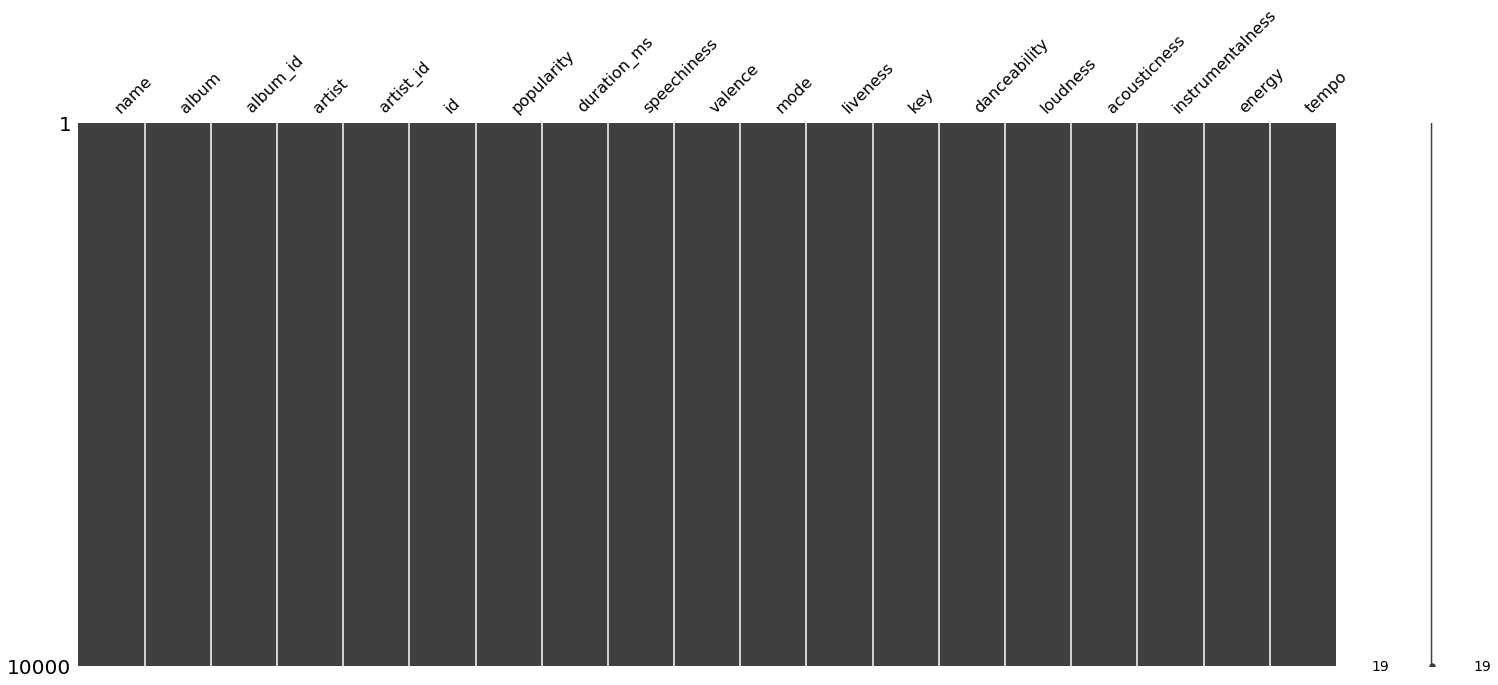

In [7]:
msno.matrix(songs_features)

### Collecting tracks from the users playlists

- Collecting tracks and features

In [8]:
playlists_songs = session.get_user_playlists(user)
playlists_features = session.get_user_playlists(user, features=True)

print("Number of Playlists: ", len(playlists_songs))

Number of Playlists:  29


- Retriving only the songs from the dictionaries

Songs

In [9]:
user_songs = [song for playlist, songs in playlists_songs for song in songs]
df_user_songs = pd.DataFrame(user_songs).drop_duplicates(subset='id')

print(df_user_songs.shape)
df_user_songs.head(3)

(14683, 8)


,name,album,album_id,artist,artist_id,id,popularity,duration_ms
0,Nate's Theme 2.0,Uncharted 2: Among Thieves (Original Video Gam...,7AeuCduXts5efoVLam7dUk,Greg Edmonson,2O0YGVBPONB6lPJYxb0q3w,2xJCwA0WygA4INcY2tMQ5g,46.0,105515.0
1,Opening​~​Bombing Mission (Final Fantasy VII),Distant Worlds: Music from Final Fantasy,04uEX0wzsnA5UcaEtxcbal,Nobuo Uematsu,3V79CTgRnsDdJSTqKitROv,0hEExwWtYKCAKdUXRCZ4JV,47.0,243293.0
2,Halo,Halo: Original Soundtrack,6GSXmRwERX2erR5xuLTajj,Martin O'Donnell,5oERdzrfb6kmNMzPNINZib,0htrx26DcVDcyXErXyJsTo,4.0,262160.0


Features

In [11]:
user_features = [song for playlist, songs in playlists_features for song in songs]
df_user_features = pd.DataFrame(user_features).drop_duplicates(subset='id')

print(df_user_features.shape)
df_user_features.head(3)

(14676, 12)


,id,speechiness,valence,mode,liveness,key,danceability,loudness,acousticness,instrumentalness,energy,tempo
0,2xJCwA0WygA4INcY2tMQ5g,0.0440,0.4020,1.0,0.1200,7.0,0.294,-14.639,0.245,0.927,0.395,127.025
1,0hEExwWtYKCAKdUXRCZ4JV,0.0512,0.2460,0.0,0.3160,9.0,0.158,-9.295,0.759,0.941,0.575,64.305
2,0htrx26DcVDcyXErXyJsTo,0.0444,0.0374,1.0,0.0976,0.0,0.312,-14.271,0.255,0.884,0.419,96.134


- Joining the datasets from above

In [14]:
user_songs_features = df_user_songs.merge(df_user_features, how='inner', on='id')

print(user_songs_features.shape)
user_songs_features.head(3)

(14676, 19)


,name,album,album_id,artist,artist_id,id,popularity,duration_ms,speechiness,valence,mode,liveness,key,danceability,loudness,acousticness,instrumentalness,energy,tempo
0,Nate's Theme 2.0,Uncharted 2: Among Thieves (Original Video Gam...,7AeuCduXts5efoVLam7dUk,Greg Edmonson,2O0YGVBPONB6lPJYxb0q3w,2xJCwA0WygA4INcY2tMQ5g,46.0,105515.0,0.0440,0.4020,1.0,0.1200,7.0,0.294,-14.639,0.245,0.927,0.395,127.025
1,Opening​~​Bombing Mission (Final Fantasy VII),Distant Worlds: Music from Final Fantasy,04uEX0wzsnA5UcaEtxcbal,Nobuo Uematsu,3V79CTgRnsDdJSTqKitROv,0hEExwWtYKCAKdUXRCZ4JV,47.0,243293.0,0.0512,0.2460,0.0,0.3160,9.0,0.158,-9.295,0.759,0.941,0.575,64.305
2,Halo,Halo: Original Soundtrack,6GSXmRwERX2erR5xuLTajj,Martin O'Donnell,5oERdzrfb6kmNMzPNINZib,0htrx26DcVDcyXErXyJsTo,4.0,262160.0,0.0444,0.0374,1.0,0.0976,0.0,0.312,-14.271,0.255,0.884,0.419,96.134


- Checking users data integrity

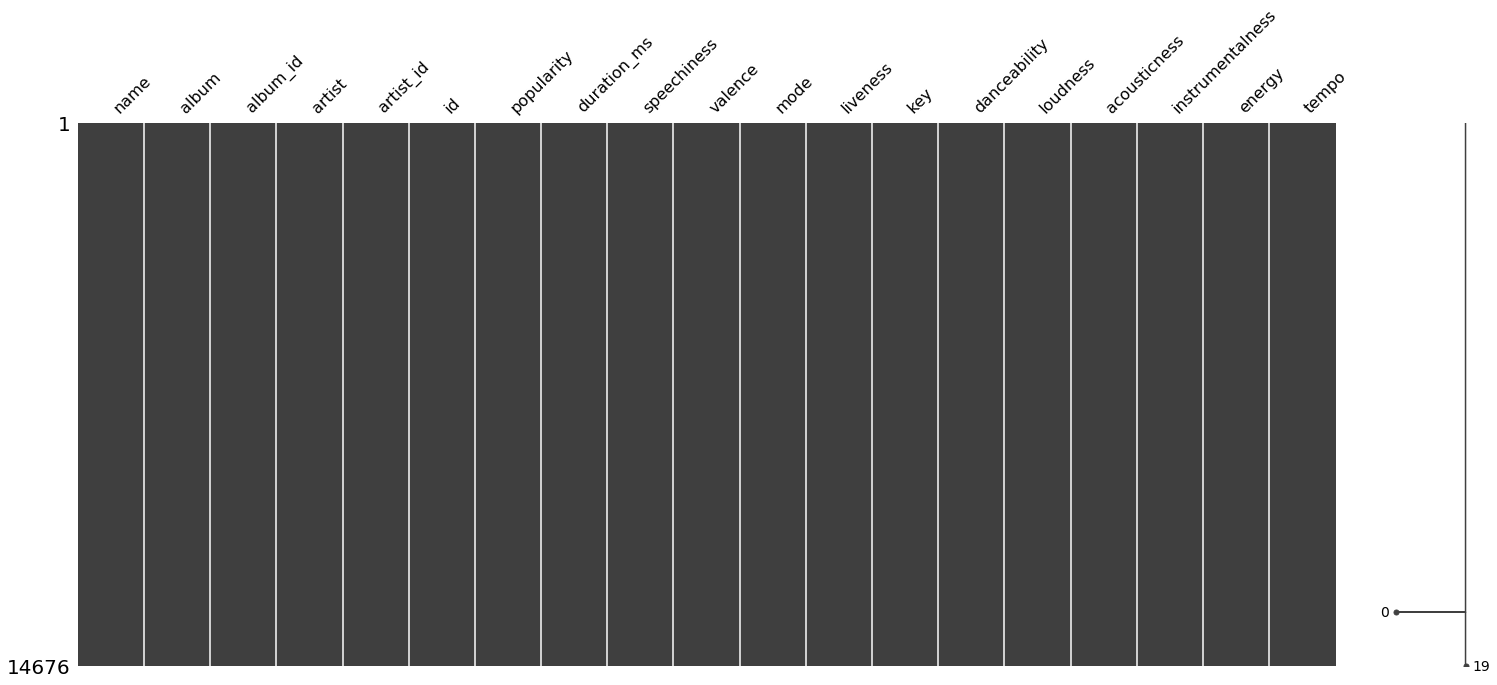

In [15]:
msno.matrix(user_songs_features)

- Cleaning null values

In [19]:
df_user_features.dropna(inplace=True)
df_user_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14675 entries, 0 to 15692
Data columns (total 12 columns):
id                  14675 non-null object
speechiness         14675 non-null float64
valence             14675 non-null float64
mode                14675 non-null float64
liveness            14675 non-null float64
key                 14675 non-null float64
danceability        14675 non-null float64
loudness            14675 non-null float64
acousticness        14675 non-null float64
instrumentalness    14675 non-null float64
energy              14675 non-null float64
tempo               14675 non-null float64
dtypes: float64(11), object(1)
memory usage: 1.5+ MB


### Exporting to csv

- Train dataset (clustering)

In [21]:
songs_features.to_csv('datasets/songs_to_cluster.csv', index=False)

- Users dataset

In [18]:
user_songs_features.to_csv('datasets/user_songs/{}_songs.csv'.format(user), index=False)

### Future works

- Pass list of users to collect songs